In [2]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom python")
from silvhua import *

sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\src")
from midterm_functions import *
from supervised import *
import seaborn as sns

In [3]:
# Index columns
columns_for_ID =[
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']

# Train PCA data
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data'
filename = 'pca_train_2022-10-30_1130.csv'
train_scaled = load_csv2(path, filename, column1_as_index=False)
train_scaled = train_scaled.set_index(columns_for_ID)

In [4]:
# Test PCA data
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data'
filename = 'pca_test_2022-10-30_1130.csv'
test_scaled = load_csv2(path, filename, column1_as_index=False).set_index(columns_for_ID)

In [7]:
train_scaled

0  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2019-01-06 AA          324                13930             13198            0.310613   
2019-01-05 UA          467                11042             11292            0.731817   
           DL          5790               14869             14831           -1.654859   
2019-01-04 AS          359                12478             14747            2.599534   
2019-01-02 HA          518                12173             12758           -1.869761   
...                                                                               ...   
2019-01-07 AA          256                12892             13930            2.027292   
2019-01-01 WN          2160               11423             15016           -0.318449   
2019-01-04 DL          522                14492             11433           -1.365188   
2019-01-06 AA          2206               11298             13303            3.192924   
2019-01-04 WN          1553               14107             11292           -0.338645   

                                                                                    1  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2019-01-06 AA          324                13930             13198            2.433447   
2019-01-05 UA          467                11042             11292           -2.127444   
           DL          5790               14869             14831           -0.506040   
2019-01-04 AS          359                12478             14747           -2.535838   
2019-01-02 HA          518                12173             12758            0.236600   
...                                                                               ...   
2019-01-07 AA          256                12892             13930           -1.594099   
2019-01-01 WN          2160               11423             15016            1.391096   
2019-01-04 DL          522                14492             11433            0.517376   
2019-01-06 AA          2206               11298             13303           -1.946304   
2019-01-04 WN          1553               14107             11292            0.029632   

                                                                                    2  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2019-01-06 AA          324                13930             13198            1.245084   
2019-01-05 UA          467                11042             11292           -0.950424   
           DL          5790               14869             14831           -0.714880   
2019-01-04 AS          359                12478             14747           -1.035049   
2019-01-02 HA          518                12173             12758            0.043878   
...                                                                               ...   
2019-01-07 AA          256                12892             13930           -1.312200   
2019-01-01 WN          2160               11423             15016            0.807869   
2019-01-04 DL          522                14492             11433           -0.541640   
2019-01-06 AA          2206               11298             13303            2.916924   
2019-01-04 WN          1553               14107             11292           -0.229014   

                                                                                    3  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2019-01-06 AA          324                13930             13198            0.583915   
2019-01-05 UA          467                11042             11292           -0.426836   
           DL          5790               14869             14831            0.342583   
2019-01-04 AS          359                12478             14747            2.195576   
2019-01-02 HA          518                12173             12758           

In [8]:
test_scaled

0  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2020-01-01 WN          4598               13891             14831           -1.409848   
                       4761               13891             14831           -1.397172   
                       5162               13891             14831           -1.377208   
                       5684               13891             14831           -1.398550   
                       6152               13891             14831           -1.367164   
...                                                                               ...   
2020-01-31 DL          4948               10721             14492           -2.711338   
                       4950               10397             15323           -2.784053   
                       4954               11193             11278           -2.125428   
                                          11278             11193           -2.842537   
                       4955               11278             11193           -2.825888   

                                                                                    1  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2020-01-01 WN          4598               13891             14831            0.420928   
                       4761               13891             14831            0.399893   
                       5162               13891             14831            0.378077   
                       5684               13891             14831            0.393126   
                       6152               13891             14831            0.390829   
...                                                                               ...   
2020-01-31 DL          4948               10721             14492            1.398097   
                       4950               10397             15323            0.624450   
                       4954               11193             11278           -0.222685   
                                          11278             11193           -0.246600   
                       4955               11278             11193           -0.268669   

                                                                                    2  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2020-01-01 WN          4598               13891             14831            1.102042   
                       4761               13891             14831            1.090598   
                       5162               13891             14831            1.076975   
                       5684               13891             14831            1.096715   
                       6152               13891             14831            1.062561   
...                                                                               ...   
2020-01-31 DL          4948               10721             14492            0.358566   
                       4950               10397             15323            0.568111   
                       4954               11193             11278           -0.413804   
                                          11278             11193            0.474521   
                       4955               11278             11193            0.454418   

                                                                                    3  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id             
2020-01-01 WN          4598               13891             14831           -0.082424   
                       4761               13891             14831           -0.067616   
                       5162               13891             14831           -0.001630   
                       5684               13891             14831           -0.029965   
                       6152               13891             14831           

In [5]:
# arrival delay data (unscaled)
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data'
filename = 'train_for_model_2022-10-29_1606.csv'
delay = load_csv2(path, filename, column1_as_index=False).set_index(columns_for_ID)['arr_delay']
delay


fl_date     mkt_carrier  mkt_carrier_fl_num  origin_airport_id  dest_airport_id
2019-01-06  AA           324                 13930              13198              13.0
2019-01-05  UA           467                 11042              11292             -14.0
            DL           5790                14869              14831              11.0
2019-01-04  AS           359                 12478              14747             -11.0
2019-01-02  HA           518                 12173              12758              -7.0
                                                                                   ... 
2019-01-07  AA           256                 12892              13930               9.0
2019-01-01  WN           2160                11423              15016             -11.0
2019-01-04  DL           522                 14492              11433             -15.0
2019-01-06  AA           2206                11298              13303              -1.0
2019-01-04  WN           1553           

In [6]:
# Get the standard deviation of actual delays
delay_std = delay.std()
delay_std

24.767966334675222

# Linear regression

In [9]:
from sklearn.linear_model import LinearRegression
from xgboost import train
from supervised import *
from sklearn.model_selection import train_test_split
param_lr = {
    'fit_intercept': [True, False]
}

# Create estimator object
lr = LinearRegression()

# Use randomized search to find best hyperparameters for estimator
lr_attributes = supervised(train_scaled, delay, lr, param_lr, model_name='linear regression')

# Train estimator and print evaluation metrics
best_lr = lr_attributes.get_best_model(scaled=False)

**Data not scaled**


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



linear regression evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		23.62		571.03		-547.41
MAE: 		16.51		16.58		-0.08
R^2: 		0.07		0.07		0.00
Best model parameters from randomized search: {'fit_intercept': True}


In [10]:
best_lr.predict(test_scaled)

array([13.71774102, 10.65946748,  5.79306311, ..., -5.16537422,
       -7.30363858, -8.77348393])

In [11]:
best_lr.coef_

array([ 0.85462195,  1.3107808 ,  1.25929555, -1.81692051,  0.15795379,
       -3.92470228,  0.37065046, -3.01371679,  0.4225999 , -3.38586062,
       -3.90825974, -0.55863219,  2.78843148,  0.81040585, -2.76010729,
        5.06144936, -1.89195967, -2.46688923, -2.8570613 , -1.71958646])

In [16]:
model_name =  'linear' # model name here
column_name = 'predicted_delay_'+model_name
results = pd.DataFrame(best_lr.predict(test_scaled) * delay_std,columns=[column_name], 
    index=test_scaled.index)
results

predicted_delay_linear
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2020-01-01 WN          4598               13891             14831                        339.760548
                       4761               13891             14831                        264.013332
                       5162               13891             14831                        143.482392
                       5684               13891             14831                        146.954774
                       6152               13891             14831                        332.815783
...                                                                                             ...
2020-01-31 DL          4948               10721             14492                       -478.106425
                       4950               10397             15323                       -105.505290
                       4954               11193             11278                       -127.935815
                                          11278             11193                       -180.896275
                       4955               11278             11193                       -217.301355

[451070 rows x 1 columns]

(array([9.78000e+02, 1.44420e+04, 7.34990e+04, 1.72407e+05, 1.45810e+05,
        3.98240e+04, 3.59900e+03, 4.24000e+02, 4.20000e+01, 4.50000e+01]),
 array([-701.48794593, -524.0083536 , -346.52876126, -169.04916893,
           8.4304234 ,  185.91001574,  363.38960807,  540.86920041,
         718.34879274,  895.82838507, 1073.30797741]),
 <BarContainer object of 10 artists>)

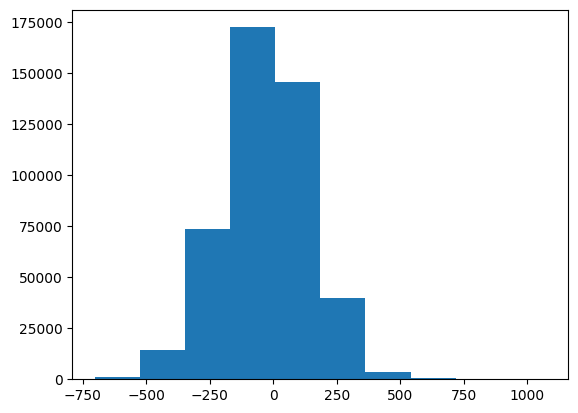

In [16]:
plt.hist(results['predicted_delay_linear'])

<AxesSubplot: xlabel='arr_delay'>

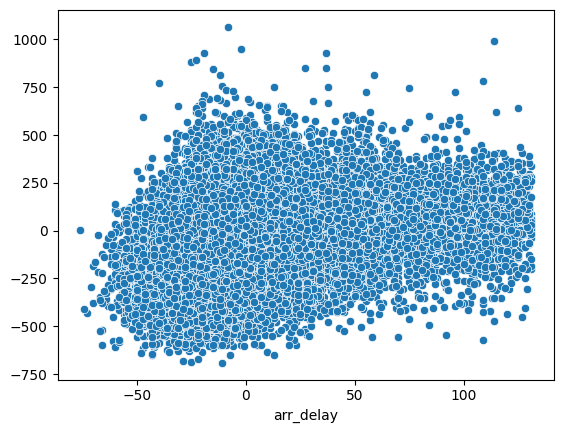

In [18]:
# Actual vs. predicted delay in training data
sns.scatterplot(x= delay, y=best_lr.predict(train_scaled)*delay_std)

In [21]:
# Save the model

model = best_lr

filename = 'Silvia_PCA_linear.sav'
savepickle(best_lr,filename,
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\models')

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/midterm-2022-10-24/models/Silvia_PCA_linear.sav


In [8]:
# Load saved model
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\models'
filename = 'Silvia_PCA_linear.sav'
best_lr = loadpickle(filename, path)

# Gradient Boost

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
param = {
    'learning_rate': np.logspace(-4,-1,4),
    'random_state': [1],
    'n_estimators': np.arange(50,150,25)
}

estimator = GradientBoostingRegressor()
model_name = 'gradient_boost'
attributes = supervised(train_scaled, delay, estimator, param, model_name=model_name)
best_gradient = attributes.get_best_model(scaled=False)

**Data not scaled**

gradient_boost evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		24.05		590.80		-566.75
MAE: 		16.72		16.76		-0.04
R^2: 		0.04		0.04		-0.00
Best model parameters from randomized search: {'random_state': 1, 'n_estimators': 75, 'learning_rate': 0.01}


In [17]:
# Add results to dataframe
model_name = 'gradient_boost'
column_name = 'predicted_delay_'+model_name
results[column_name] = best_gradient.predict(test_scaled) * delay_std
results

predicted_delay_linear  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                           
2020-01-01 WN          4598               13891             14831                        339.760548   
                       4761               13891             14831                        264.013332   
                       5162               13891             14831                        143.482392   
                       5684               13891             14831                        146.954774   
                       6152               13891             14831                        332.815783   
...                                                                                             ...   
2020-01-31 DL          4948               10721             14492                       -478.106425   
                       4950               10397             15323                       -105.505290   
                       4954               11193             11278                       -127.935815   
                                          11278             11193                       -180.896275   
                       4955               11278             11193                       -217.301355   

                                                                             predicted_delay_gradient_boost  
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                  
2020-01-01 WN          4598               13891             14831                                 85.306260  
                       4761               13891             14831                                 85.648448  
                       5162               13891             14831                                -13.078907  
                       5684               13891             14831                                -13.078907  
                       6152               13891             14831                                 85.306260  
...                                                                                                     ...  
2020-01-31 DL          4948               10721             14492                               -105.017870  
                       4950               10397             15323                                -38.858704  
                       4954               11193             11278                                -91.620429  
                                          11278             11193                                -69.081278  
                       4955               11278             11193                                -69.081278  

[451070 rows x 2 columns]

In [29]:
delay

fl_date     mkt_carrier  mkt_carrier_fl_num  origin_airport_id  dest_airport_id
2019-01-06  AA           324                 13930              13198              13.0
2019-01-05  UA           467                 11042              11292             -14.0
            DL           5790                14869              14831              11.0
2019-01-04  AS           359                 12478              14747             -11.0
2019-01-02  HA           518                 12173              12758              -7.0
                                                                                   ... 
2019-01-07  AA           256                 12892              13930               9.0
2019-01-01  WN           2160                11423              15016             -11.0
2019-01-04  DL           522                 14492              11433             -15.0
2019-01-06  AA           2206                11298              13303              -1.0
2019-01-04  WN           1553           

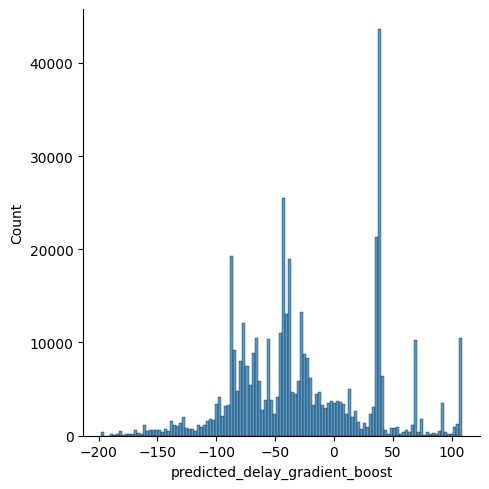

In [33]:
sns.displot(results['predicted_delay_gradient_boost'])

<AxesSubplot: xlabel='arr_delay'>

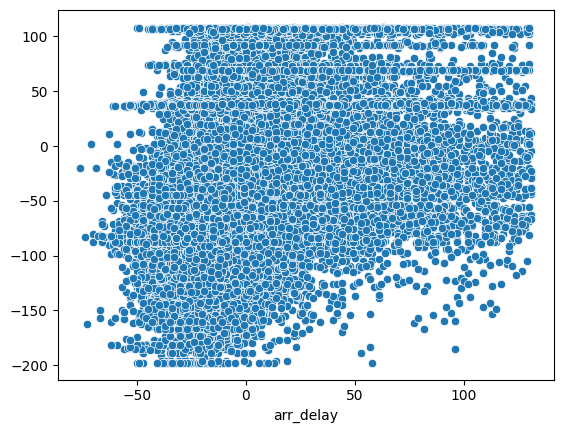

In [37]:
# actual vs. predicted delay for training data for gradient boost
sns.scatterplot(x=delay, y=best_gradient.predict(train_scaled)*delay_std)

In [41]:
# Save the model
model = best_gradient
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\models'
filename = 'Silvia_PCA_gradientboost.sav'
savepickle(model,filename,path=path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/midterm-2022-10-24/models/Silvia_PCA_gradientboost.sav


In [14]:
# Load saved model
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\models'
filename = 'Silvia_PCA_gradientboost.sav'
best_gradient = loadpickle(filename, path)

## Compare linear and gradient boost predictions

<AxesSubplot: xlabel='predicted_delay_linear', ylabel='predicted_delay_gradient_boost'>

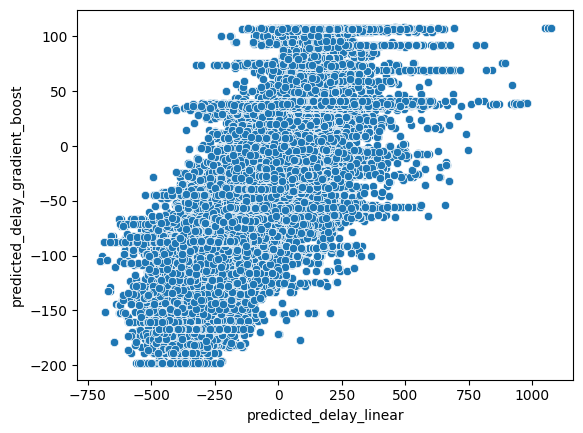

In [38]:
sns.scatterplot(data=results,x='predicted_delay_linear',y='predicted_delay_gradient_boost')

# XGBoost

In [57]:
# update the supervised class to make a plot and to create attributes using evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib as plt
class supervised2:
    """
    * Split the data
    * Scale the data
    * Perform the following for both raw and scaled data:
        * Random search to find best parameters
        * Print model evalutation metrics: 
            * recall
            * precision
            * F1
            * AUC score
        * Plot:
            * confusion matrix
            * ROC
    Params:
    * df: Dataframe with all data and target variable as last column.
    
    Returns:
    * Best model from random search
    """
    
    def __init__(self, X, y, estimator, param_distributions, model_name):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8,random_state=0)
        self.X_train_pre = Xtrain
        self.X_test_pre =  Xtest
        self.y_train = ytrain
        self.y_test =  ytest
        self.estimator = estimator
        self.params = param_distributions
        self.model_name = model_name

    def get_best_model2(self,scaled=False,plot=True):
        if scaled==True:
            scaler = StandardScaler()
            self.X_train = scaler.fit_transform(self.X_train_pre)
            self.X_test = scaler.transform(self.X_test_pre)
            print('**Data has been scaled.**')
        else:
            self.X_train = self.X_train_pre
            self.X_test = self.X_test_pre
            print('**Data not scaled**')
        search = RandomizedSearchCV(self.estimator, param_distributions=self.params, n_iter=4, random_state=0,scoring=None)
        search.fit(self.X_train, self.y_train)
        best_model = search.best_estimator_

        y_pred = best_model.predict(self.X_test)
        y_pred_train = best_model.predict(self.X_train)
    
       
        # Metrics for test data

        self.rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        self.mean_abs_error = mean_absolute_error(self.y_test, y_pred)
        self.r2 = r2_score(self.y_test, y_pred)

        # Metrics for training data

        self.rmse_train = mean_squared_error(self.y_train, y_pred_train)
        self.mean_abs_error_train = mean_absolute_error(self.y_train, y_pred_train)
        self.r2_train = r2_score(self.y_train, y_pred_train)

        print(f'\n{self.model_name} evaluation metrics: \n\tTest data\tTraining data\t\tDifference')
        print(f'RMSE: \t\t{self.rmse:.2f}\t\t{self.rmse_train:.2f}\t\t{(self.rmse - self.rmse_train):.2f}')
        print(f'MAE: \t\t{self.mean_abs_error:.2f}\t\t{self.mean_abs_error_train:.2f}\t\t{(self.mean_abs_error - self.mean_abs_error_train):.2f}')
        print(f'R^2: \t\t{self.r2:.2f}\t\t{self.r2_train:.2f}\t\t{(self.r2 - self.r2_train):.2f}')
        
        print(f'Best model parameters from randomized search: {search.best_params_}')

        if plot:
            self.fig = sns.scatterplot(x=self.y_test, y=y_pred)
            self.fig.set_xlabel('Predicted')

        return best_model

**Data not scaled**

xgboost evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		22.60		458.11		-435.51
MAE: 		15.67		14.75		0.92
R^2: 		0.15		0.26		-0.10
Best model parameters from randomized search: {'max_depth': 5, 'learning_rate': 0.31622776601683794, 'colsample_bytree': 0.4, 'alpha': 0}


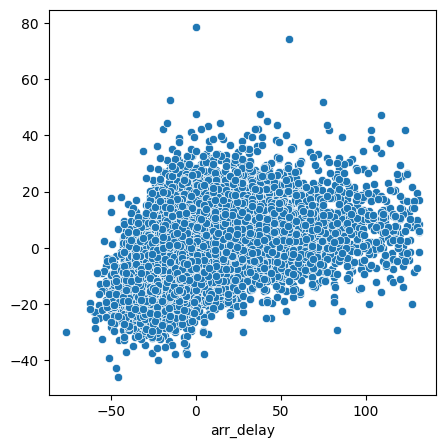

In [58]:
import xgboost as xgb
param = {
    'colsample_bytree': np.arange(0.4,1.2,.2), # [0.4, 0.6, 0.8, 1. ]
    'learning_rate': np.logspace(-2,-.5,4), # [0.01      , 0.03162278, 0.1       , 0.31622777]
    'alpha': np.arange(0,5,1),
    'max_depth': np.arange(2,6,1) # [2, 3, 4, 5]
}

estimator = xgb.XGBRegressor()
model_name = 'xgboost'
attributes = supervised2(train_scaled, delay, estimator, param, model_name=model_name)
best_xgb = attributes.get_best_model2(scaled=False)

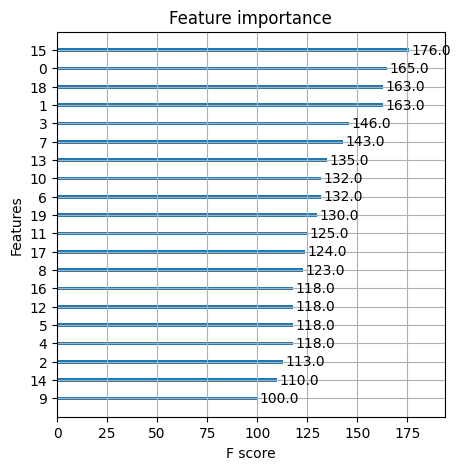

In [31]:
xgb.plot_importance(best_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [35]:
# Add results to dataframe
column_name = 'predicted_delay_'+model_name
results[column_name] = best_xgb.predict(test_scaled) * delay_std
results

predicted_delay_linear  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                           
2020-01-01 WN          4598               13891             14831                        339.760548   
                       4761               13891             14831                        264.013332   
                       5162               13891             14831                        143.482392   
                       5684               13891             14831                        146.954774   
                       6152               13891             14831                        332.815783   
...                                                                                             ...   
2020-01-31 DL          4948               10721             14492                       -478.106425   
                       4950               10397             15323                       -105.505290   
                       4954               11193             11278                       -127.935815   
                                          11278             11193                       -180.896275   
                       4955               11278             11193                       -217.301355   

                                                                             predicted_delay_gradient_boost  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                   
2020-01-01 WN          4598               13891             14831                                 85.306260   
                       4761               13891             14831                                 85.648448   
                       5162               13891             14831                                -13.078907   
                       5684               13891             14831                                -13.078907   
                       6152               13891             14831                                 85.306260   
...                                                                                                     ...   
2020-01-31 DL          4948               10721             14492                               -105.017870   
                       4950               10397             15323                                -38.858704   
                       4954               11193             11278                                -91.620429   
                                          11278             11193                                -69.081278   
                       4955               11278             11193                                -69.081278   

                                                                             predicted_delay_xgboost  
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                           
2020-01-01 WN          4598               13891             14831                         313.415527  
                       4761               13891             14831                         257.174622  
                       5162               13891             14831                        -140.152847  
                       5684               13891             14831                        -140.152847  
                       6152               13891             14831                         300.826569  
...                                                                                              ...  
2020-01-31 DL          4948               10721             14492                        -362.750275  
                       4950               10397             15323                        -129.949631  
                       4954               11193             11278                        -202.721283  
                                          11278             11193                        -450.701538  
                       4955               11278          

In [36]:
# Save the model
model = best_xgb
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\models'
filename = 'Silvia_PCA_xgboost'
savepickle(model,filename,path=path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/midterm-2022-10-24/models/Silvia_PCA_xgboost.sav


## Compare linear and XGBoost predictions

<AxesSubplot: xlabel='predicted_delay_linear', ylabel='predicted_delay_xgboost'>

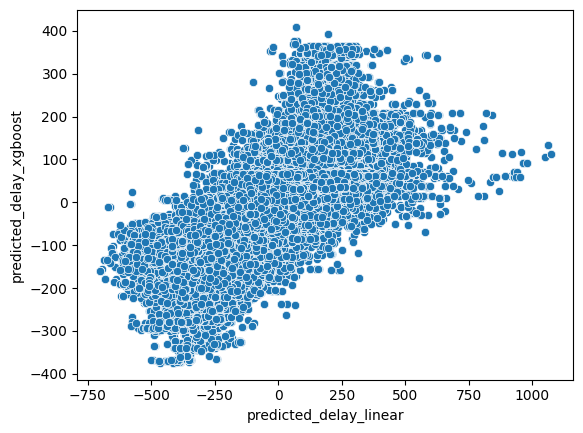

In [48]:
sns.scatterplot(data=results,x='predicted_delay_linear',y='predicted_delay_xgboost')

# Save CSV

In [66]:
save_csv(results, 'submission_model_predictions_PCA_features_',
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24',
append_version=True)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/midterm-2022-10-24/submission_model_predictions_PCA_features_2022-10-30_1545


# *End of Page*